# Минипроект 5. Анализ взаимодействий с рекламными объявлениями.
(ТЗ в ВК)

### Описание данных
Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (те, кто разместил эти объявления).

__ads_data.csv – данные взаимодействий с рекламными объявлениями__
- date – дата
- time – время
- event – действие (просмотр/клик)
- platform – платформа
- ad_id – id объявления
- client_union_id – id рекламного кабинета
- campaign_union_id – id рекламной кампании
- ad_cost_type – тип оплаты
- ad_cost – цена
- has_video – есть ли видео
- target_audience_count – размер аудитории


__ads_clients_data.csv – характеристики рекламных клиентов__
- date – дата
- client_union_id – id рекламного кабинета
- community_id – id сообщества
- create_date – дата создания рекламного клиента

#### Импорт библиотек

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

### Предобработка данных

#### Импорт данных

In [3]:
ads_data = pd.read_csv('/Users/ola/Documents/Karpov/6. Подробнее о визуализации/ads/ads_data.csv')

In [4]:
ads_clients_data = pd.read_csv('/Users/ola/Documents/Karpov/6. Подробнее о визуализации/ads/ads_clients_data.csv')

#### Первый взгляд на данные

In [5]:
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [6]:
ads_clients_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


#### Работа с типами данных

In [7]:
# Посмотрим на типы данных

ads_data.dtypes

date                      object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
dtype: object

In [8]:
ads_clients_data.dtypes

date               object
client_union_id     int64
community_id        int64
create_date        object
dtype: object

In [9]:
# Приведем колонки date и time к формату datetime

ads_data['date'] = pd.to_datetime(ads_data['date'])
ads_data['time'] = pd.to_datetime(ads_data['time'])


# Приведем колонки date и create_date к формату datetime

ads_clients_data['date'] = pd.to_datetime(ads_clients_data['date'])
ads_clients_data['create_date'] = pd.to_datetime(ads_clients_data['create_date'])

In [10]:
# Посмотрим на типы данных после преобразования

ads_data.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [11]:
ads_clients_data.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

#### Работа с пропущенными значениями

In [12]:
ads_data.isna().sum()

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64

In [13]:
ads_clients_data.isna().sum()

date               0
client_union_id    0
community_id       0
create_date        0
dtype: int64

Пропущенных значений нет

#### Работа с дубликатами

In [14]:
ads_data.drop_duplicates().shape

(317330, 11)

В датасете около 70% строк являются дубликатами. Специфика данных допускает их присутствие.

In [15]:
ads_clients_data.drop_duplicates().shape

(122078, 4)

Дубликатов нет.

### Задание 1
Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент - помните, что некоторые показываемые объявления не кликались, и что при группировке в таких случаях не будет строк с кликами. Округлите ответы до целых чисел

Hint: Не забудьте учесть объявления, у которых не было кликов

Hint2: Здесь среднее нужно считать не через mean, а обходным путём

Могут понадобится:
- pivot
- filina()

In [16]:
# Построим сводную таблицу, в которой по каждому объвлению будет расччитано количество кликов и показов

pivot_ads_data = ads_data.pivot_table(
                                       index = 'ad_id',
                                       columns = 'event',
                                       values = 'ad_cost',
                                       aggfunc = 'count', 
                                       fill_value = 0
                                    )
pivot_ads_data

event,click,view
ad_id,,
2,1,101
3,3,184
1902,1,41
2064,0,35
2132,1,58
...,...,...
122004,4,100
122013,0,156
122023,0,68


In [17]:
# Вычисление среднего значения

pivot_ads_data.mean().round()

event
click    113.0
view     923.0
dtype: float64

### Задание 2

Давайте посмотрим на распределение показов обьявлений!

- По оси х - число показов 
- По оси у - доля объявлений с такими показами

Постройте график распределения показов на объявление за весь период, а затем прологарифмируйте значения, чтобы можно было понять форму распределения

### Нерациональное решение

In [18]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [19]:
# Датафрейм с распределением объявлений по числу просмотров
# views_number - число просмотров по объявлению
# number_of_ads - число объявлений с таким количеством просмотров

distribution_of_ads_by_views = ads_data \
                                                .query('event == "view"') \
                                                .groupby(['ad_id'], as_index = False) \
                                                .agg({'ad_cost': 'count'}) \
                                                .rename(columns = {'ad_cost': 'views_number'}) \
                                                .groupby('views_number', as_index = False) \
                                                .agg({'ad_id': 'count'}) \
                                                .rename(columns = {'ad_id': 'number_of_ads'})

distribution_of_ads_by_views

,views_number,number_of_ads
0,10,1
1,11,2
2,13,4
3,14,3
4,15,6
...,...,...
377,19668,1
378,24152,1
379,51996,1
380,184596,1


In [20]:
# Посчитаем общее количество объявлений

number_of_ads = ads_data.ad_id.nunique()

number_of_ads

965

In [21]:
# Посчитаем общее количество объявлений через объявления, у которых были показы

distribution_of_ads_by_views.number_of_ads.sum()

956

In [22]:
# Аналогично

ads_data.query('event == "view"').ad_id.nunique()

956

Заметим, что получаются разные числа, что говорит об ошибке в данных, тк не может быть клика без показа

In [23]:
# Создадим колонку, в которой будет хранится доля объявлений с такими показами

distribution_of_ads_by_views['ads_share'] = distribution_of_ads_by_views['number_of_ads'] / number_of_ads

In [24]:
distribution_of_ads_by_views.head()

,views_number,number_of_ads,ads_share
0,10,1,0.001036
1,11,2,0.002073
2,13,4,0.004145
3,14,3,0.003109
4,15,6,0.006218


<AxesSubplot:xlabel='views_number', ylabel='ads_share'>

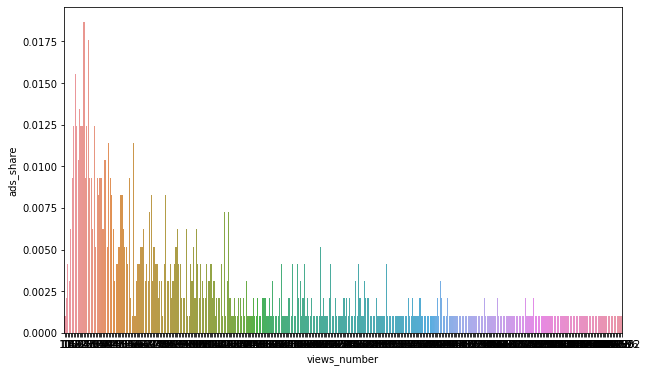

In [25]:
# Построение графика распределения показов

plt.figure(figsize = (10, 6))
sns.barplot(data = distribution_of_ads_by_views, x = 'views_number', y = 'ads_share')

/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:373: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)


<AxesSubplot:xlabel='views_number', ylabel='ads_share'>

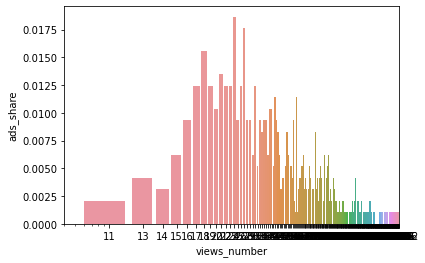

In [26]:
# Прологарифмируем ось x

plt.semilogx()
sns.barplot(data = distribution_of_ads_by_views, x = 'views_number', y = 'ads_share')

### Рациональное решение (distplot и есть распределение !!!)


In [27]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [28]:
# Число показов на рекламу

views_per_ad = ads_data \
                         .query('event == "view"') \
                         .groupby(['ad_id'], as_index = False) \
                         .agg({'ad_cost': 'count'}) \
                         .rename(columns = {'ad_cost': 'views_number'}) \

views_per_ad

,ad_id,views_number
0,2,101
1,3,184
2,1902,41
3,2064,35
4,2132,58
...,...,...
951,122004,100
952,122013,156
953,122023,68
954,122031,138


<AxesSubplot:xlabel='views_number', ylabel='Count'>

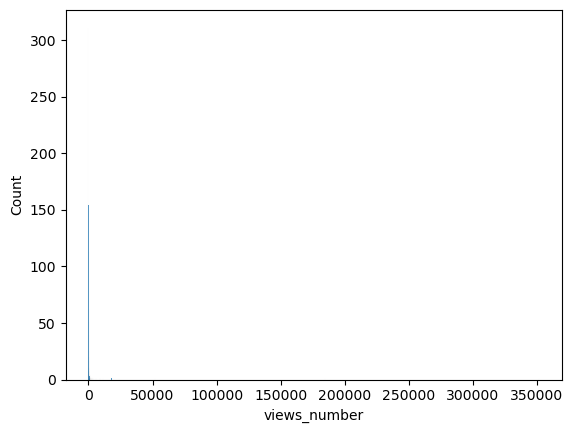

In [40]:
# Построение графика распределения показов

sns.histplot(views_per_ad['views_number'])

In [41]:
# Настроим параметры графиков

sns.set(
        font_scale = 2,
        style = "whitegrid",
        rc = {'figure.figsize': (20,7)}
        )

In [42]:
# Прологарифмируем ось x

In [43]:
views_per_ad['log_views'] = np.log(views_per_ad['views_number'])

<AxesSubplot:xlabel='log_views', ylabel='Count'>

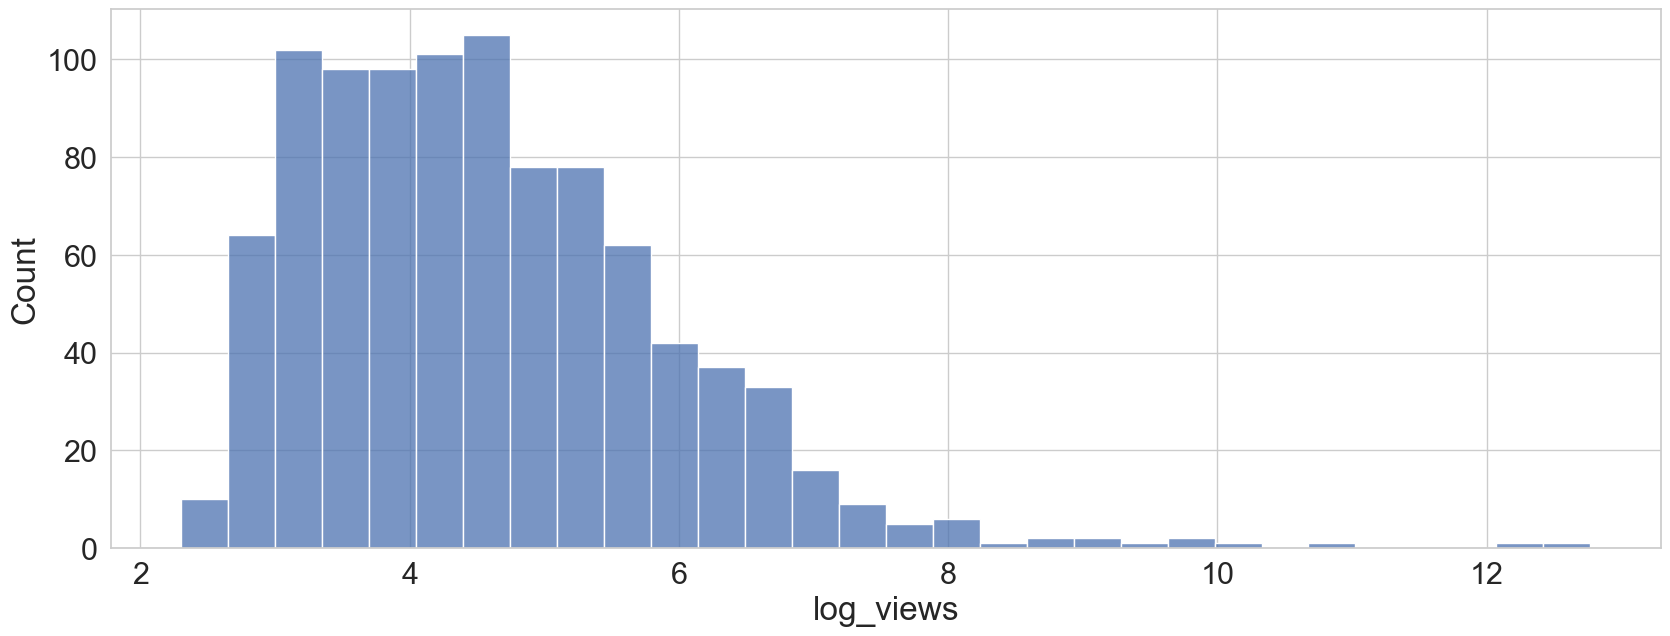

In [44]:
sns.histplot(views_per_ad['log_views'])

### Задание 3
А теперь давайте посчитаем среднее число показов рекламы в каждый из дней, а затем скользящее среднее по этим данным с окном в 2 элемента.

Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа

Hint: здесь необходимо 2 раза рассчитать среднее

Hint2: первое среднее считается по числу показанных реклам для каждого дня, а 2-ое - просто применение rolling

Могут пригодиться:
- pivot
- скользящее среднее

In [45]:
# Создадим сводную таблицу с данными о количестве показов по каждому объявлению в каждый из дней

ads_view_per_date = pd.pivot_table(
                                       data = ads_data,
                                       index = 'ad_id',
                                       columns = 'date',
                                       values = 'ad_cost',
                                       aggfunc = 'count',
                                       fill_value = 0
                                   )

ads_view_per_date

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,84,18,0,0,0,0
3,160,27,0,0,0,0
1902,0,0,35,7,0,0
2064,0,28,7,0,0,0
2132,0,0,25,28,6,0
...,...,...,...,...,...,...
122004,88,16,0,0,0,0
122013,0,0,0,134,22,0
122023,0,0,0,53,15,0


In [46]:
# Найдем среднее количество показов по дням

mean_views = ads_view_per_date.mean()

mean_views

date
2019-04-01     22.873575
2019-04-02     48.825907
2019-04-03     61.640415
2019-04-04    285.735751
2019-04-05    538.556477
2019-04-06     78.637306
dtype: float64

In [47]:
# Найдем скользящее среднее по среднему количеству показов по дням

rolling_views = mean_views.rolling(2).mean()

rolling_views

date
2019-04-01           NaN
2019-04-02     35.849741
2019-04-03     55.233161
2019-04-04    173.688083
2019-04-05    412.146114
2019-04-06    308.596891
dtype: float64

In [48]:
rolling_views['2019-04-06'].round()

309.0

### Задание 4
Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате YYYY-MM-DD

<AxesSubplot:xlabel='date'>

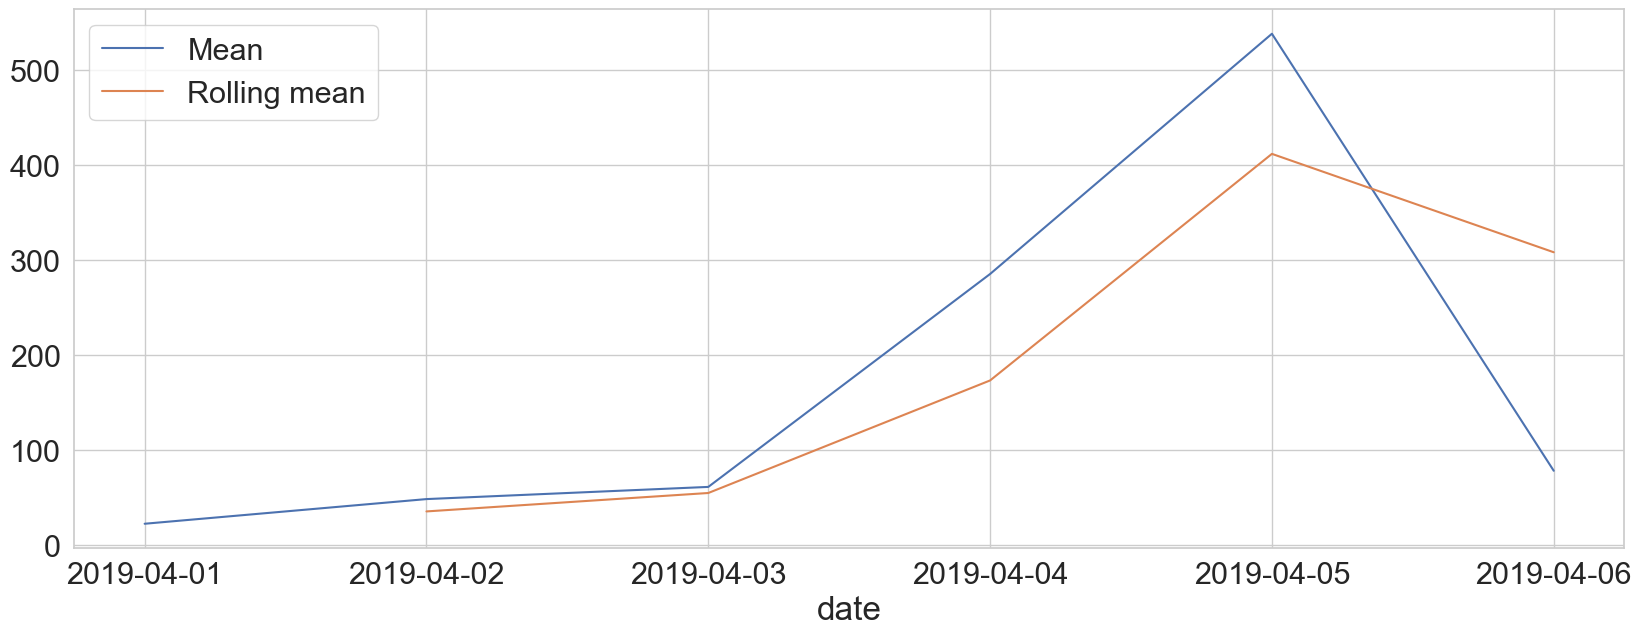

In [52]:
# Построим график среднего и скользящего среднего на одной картинке

sns.lineplot(data = mean_views, label = 'Mean')
sns.lineplot(data = rolling_views, label = 'Rolling mean')

In [60]:
# Посчитаем, в какой день наблюдается наибольшая разница по модулю между средним и скользящим средним


anomaly_day = (mean_views - rolling_views).abs().idxmax()

anomaly_day

Timestamp('2019-04-06 00:00:00')

Аномалия в данных прослеживается 2019-04-06

### Задание 5
Ну а теперь найдём проблемное объявление (с наибольшим/наименьшим количеством показов) в день, в который была замечена самая большая по модулю аномалия. То есть нужно переиспользовать предыдущий результат и найти среди данных рекламы в тот день объявление с наибольшим или наименьшим числом показов.

Потом напишите функцию, которая будет искать такое объявление в датасэте

В ответе укажите іd проблемного объявления в день, полученный на предыдущем шаге

Hint: объявление с каким числом повторов искать (наибольшее/наименьшее) зависит от того меньше или больше скользящее среднее чем просто среднее

In [56]:
ads_view_per_date

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,84,18,0,0,0,0
3,160,27,0,0,0,0
1902,0,0,35,7,0,0
2064,0,28,7,0,0,0
2132,0,0,25,28,6,0
...,...,...,...,...,...,...
122004,88,16,0,0,0,0
122013,0,0,0,134,22,0
122023,0,0,0,53,15,0


In [78]:
# Найдем проблемное объявление

ads_view_per_date[anomaly_day].idxmax()

112583

In [91]:
ads_view_per_date.max()

date
2019-04-01      1254
2019-04-02      4702
2019-04-03     15357
2019-04-04    154968
2019-04-05    393828
2019-04-06     63741
dtype: int64

In [85]:
# Функция для поиска аномального дня
# Входные параметры: датасет, где колонки - дата, строки - id объявления, значения - среднее количество показов
# Выходные параметры: id аномального объявления

def anomaly_ad(ad_view_per_day_per_ad):
    
    # Запишем значения среднего и скользящего среднего по дням в переменные mean_views, rolling_views
    
    mean_views = ad_view_per_day_per_ad.mean() # среднее
    rolling_views = mean_views.rolling(2).mean() # скользящее среднее
    
    # Запишем дату аномального дня в переменную anomaly_day
    
    mean_difference = mean_views - rolling_views # разность среднего и скользящего среднего
    anomaly_day = mean_difference.abs().idxmax() # аномальный день
    
    # Поиск id аномального объявления
    
    # Если среднее больше cкользящего среднего, то ищем min значение
    if mean_difference[anomaly_day] > 0:
        anomaly_ad_id = ad_view_per_day_per_ad[anomaly_day].idxmin()
        
    # Если среднее меньше скользящего среднего, то ищем max значение
    else:
        anomaly_ad_id = ad_view_per_day_per_ad[anomaly_day].idxmax()
        
    # Возвращаем id аномального объявления
    
    return anomaly_ad_id

In [86]:
anomaly_add(ads_view_per_date)

112583

### Задание 6
Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [92]:
ads_clients_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [106]:
# Датафрейм с датой создания каждого рекламного клиента и датой первого запуска объявления этим клиентом

clients_start_dates = ads_clients_data.merge(
                                                ads_data,
                                                how = 'left',
                                                on = 'client_union_id'
                                               ) \
                                        .groupby(['client_union_id', 'create_date'], as_index = False) \
                                        .agg({'date_y': 'min'}) \
                                        .rename(columns = {'date_y': 'first_launch_date'})      

clients_start_dates

,client_union_id,create_date,first_launch_date
0,1,2018-12-24,2019-04-01
1,2,2019-02-10,NaT
2,3,2019-01-25,NaT
3,4,2018-12-09,NaT
4,5,2019-01-08,NaT
...,...,...,...
122073,122074,2018-12-21,NaT
122074,122075,2018-11-09,NaT
122075,122076,2018-10-27,NaT
122076,122077,2018-12-05,NaT


In [113]:
# Добавим в датафрейм clients_start_dates столбец с разностью в днях между 
# созданием клиента и запуском первого объявления

clients_start_dates['dif_dates'] = clients_start_dates['first_launch_date'] - clients_start_dates['create_date']

clients_start_dates.head()

,client_union_id,create_date,first_launch_date,dif_dates
0,1,2018-12-24,2019-04-01,98 days
1,2,2019-02-10,NaT,NaT
2,3,2019-01-25,NaT,NaT
3,4,2018-12-09,NaT,NaT
4,5,2019-01-08,NaT,NaT


In [111]:
# Найдем среднее количество дней от даты создания рекламного клиента
# и первым запуском рекламного объявления этим клиентом

clients_start_dates['dif_dates'].mean()

Timedelta('124 days 09:04:43.532219570')

### Задание 7
Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.


Конверсия - отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна 50/1000 * 100 = 5%

Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой
рекламы с pd. Timedelta (365, unit='d'))

Ответ дайте в процентах и округлите до сотых

In [124]:
# Отберем данные за нужный промежуток и посчитаем количество клиентов, совершивших целевое действие

count_goal_clients = clients_start_dates[clients_start_dates['dif_dates'] < pd.Timedelta(365, unit = 'd')].shape[0]

In [130]:
# Отберем данные за нужный промежуток и посчитаем количество клиентов

count_clients = clients_start_dates.shape[0]

In [128]:
# Посчитаем конверсию, конвертируем в проценты и округлим до сотых

round((count_goal_clients/count_clients) * 100, 2)

0.69

### Задание 8
Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() [0, 30, 90, 180, 365]

Создать временные промежутки можно с помощью pd.to_timedelta()

Могут пригодиться:
- pd.cut()
- nunique()

In [155]:
# Cписок с инервалами категорий

bins = pd.to_timedelta([0, 30, 90, 180, 365], unit = 'd')

In [156]:
# Добавим в датафрейм clients_start_dates колонку с информацией о промежутке 
# от создания рекламного кабинета до запуска первого рекламного объявления

clients_start_dates['create_categorical'] = pd.cut(
                                                   clients_start_dates.dif_dates, 
                                                   bins = bins,
                                                   labels = ['less than 1 month',
                                                           '1-3 months',
                                                           '3-6 months',
                                                           'more than 6 months'
                                                            ]
                                                  )

In [157]:
# Посчитаем, сколько клиентов принадлежит каждому интервалу

clients_start_dates['create_categorical'].value_counts()

3-6 months            396
1-3 months            263
more than 6 months    168
less than 1 month      11
Name: create_categorical, dtype: int64

11 уникальных клиентов запустили свое первое объявление в первый месяц своего существования

### Задание 9
А теперь давайте выведем на интерактивный график эти категории с количеством уникальных клиентов в них.


In [169]:
fig = px.histogram(
                    clients_start_dates.create_categorical,
                    labels = {'value': 'Время, прошедшее с момента регистрации до создания первого объявления',
                              'count': 'Количество рекламных кабинетов'}
                  )
fig.show()